<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Special_Topics_Pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Special Topics - Part 3

Introduction to Monte Carlo Methods in Python
=====================================

### Spontaneous Decay Simulation:

A sample of $N$ radioactive atoms undergo spontanneous decay in time. The probability of an atom to decay within a given time interval $\Delta t$ is proportional to the length of time. Thus, if $N$ atoms reduce to $N-\Delta N$ in time $\Delta t$,
\begin{equation*}
P = -\lambda \Delta t  = \frac{\Delta N}{N},
\end{equation*}
where $\lambda$ is the decay rate. In the continuum limit, where $\Delta N \ll N$, we can approximate the result above by the differential equation $\displaystyle\frac{dN}{dt} = -\lambda N$, yielding an exponential decay $N(t) = N_0e^{-\lambda t}$. However, we shall use Monte Carlo methods to simulate the exact process, and compare this to the continuum solution. The algorithm is simple. At each time, for each undecayed atom, choose a uniform random number $r$ and decrement the number of atoms only if $r < \lambda$. This yields the number of atoms at every time step.

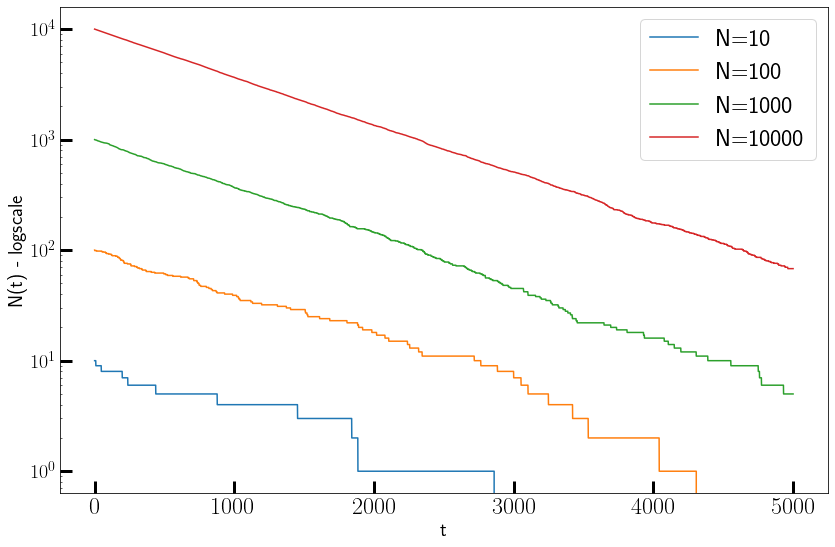

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20

# Decay constant
lambda1 = 1e-3

natoms_arr = [10, 100, 1000, 10000]
maxtime = 5000

timeline = np.arange(0, maxtime  + 1)
for natoms in natoms_arr:
    natoms_begin = natoms
    natoms_time = []
    for time in timeline:
        decays = np.random.random(natoms)
        natoms -= np.count_nonzero(decays < lambda1)
        natoms_time.append(natoms)
    
    plt.plot(timeline, natoms_time,label=f'N={natoms_begin}')

plt.ylabel("N(t) - logscale")
plt.xlabel("t")
plt.yscale("log")
plt.legend()
plt.show()

### Stimulated Emission
Devise and test a model for spontaneous decay including the effect of *stimulated emission*. This might describe decaying particles trapped within a cavity. One approach is to modify the spontaneous decay simulation above by having the decay rate $\lambda$ increase as the number of atoms increases. Suppose that
\begin{equation*}
P = -\lambda\left(1 + \alpha\frac{ N(t)}{ N (0)}\right) \Delta t  = \frac{\Delta N(t)}{N},
\end{equation*}

We can simply modify the code above by updating the value of $\lambda$ at each time step as follows

\begin{equation*}
\lambda \rightarrow \lambda\left(1 + \alpha\frac{ N(t)}{ N (0)}\right)
\end{equation*}

First, let us define $r = \alpha/\lambda$.

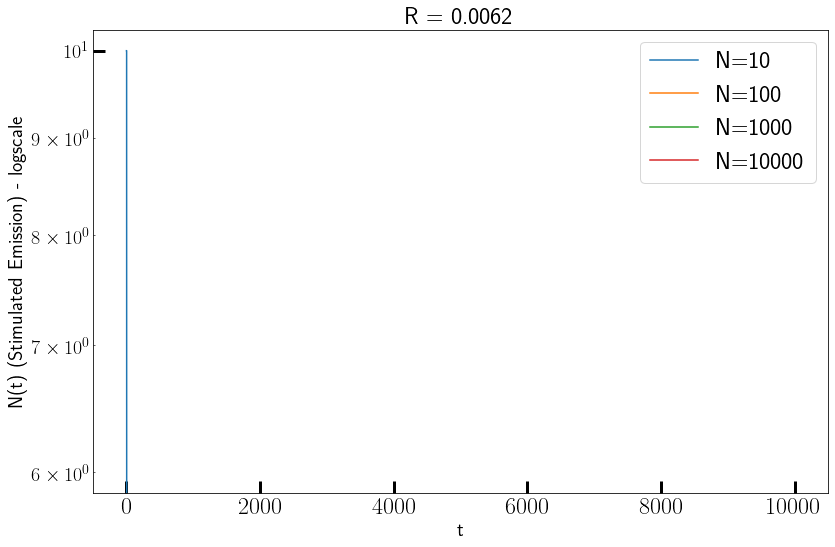

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20

# r = 1e-7
# r = 4e-7
# r = 1e-3
r = 6.2e-3
# r = 1e-2

# Decay constant
lambda1 = 1e-3
alpha = r/lambda1

natoms_arr = [10, 100, 1000, 10000]
maxtime = 10000

timeline = np.arange(0, maxtime  + 1)
for natoms in natoms_arr:
    natoms_begin = natoms
    natoms_time = []
    for time in timeline:
        decays = np.random.random(natoms)
        natoms -= np.count_nonzero(decays < lambda1)
        # Update the value of lambda1
        lambda1 *= 1 + alpha * natoms/natoms_begin
        natoms_time.append(natoms)
    
    plt.plot(timeline, natoms_time,label=f'N={natoms_begin}')

plt.title(f"R = {r}")
plt.ylabel("N(t) (Stimulated Emission) - logscale")
plt.xlabel("t")
plt.yscale("log")
plt.legend()
plt.show()

### 2D Random Walk (Landau 7.3.1 Ex1)

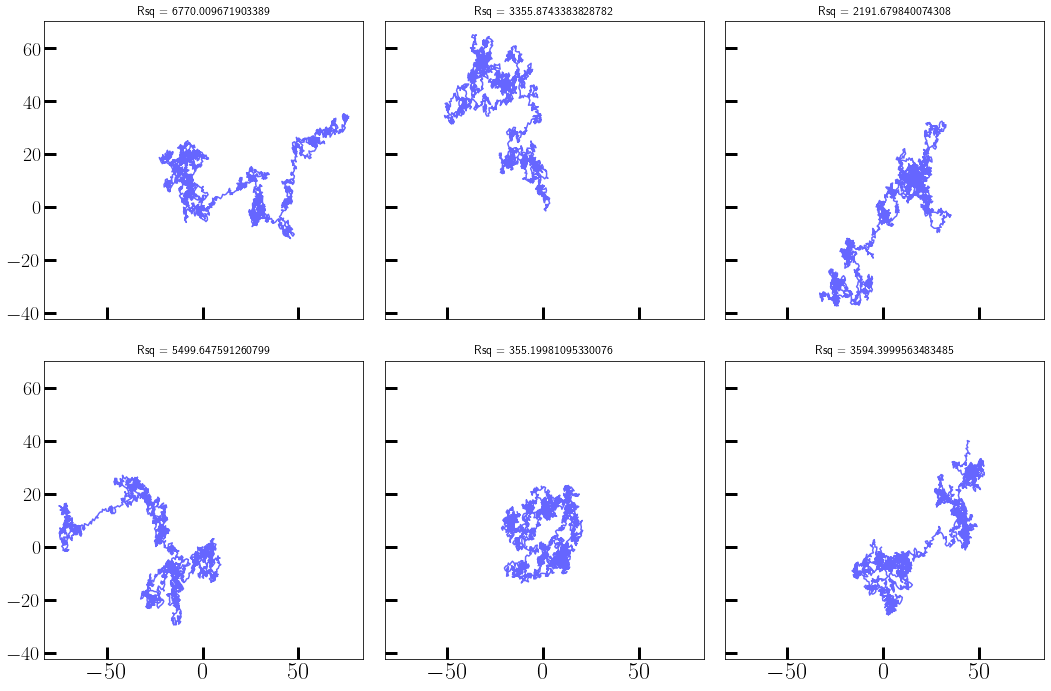

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.size'] = 20

fig, axs = plt.subplots(2,3, sharex=True, sharey=True)
axs = axs.flatten()

jmax = 2500

for ax in axs:
    dr_vals = 2.0 * np.random.random((jmax,2)) -1 # dx, dy points between -1 and 1
    Lvals = np.sum(dr_vals**2, axis=1) # Vector lengths of those points
    dr_vals /= np.sqrt(Lvals[:, None]) # Normalize the points

    points = np.cumsum(dr_vals, axis=0) #Perform the random walk
    Rsq = np.linalg.norm(points[-1])**2
    ax.set_title(f"Rsq = {Rsq}", fontsize=12)
    ax.plot(points[:,0], points[:,1], color='blue', alpha=0.6)

plt.show()

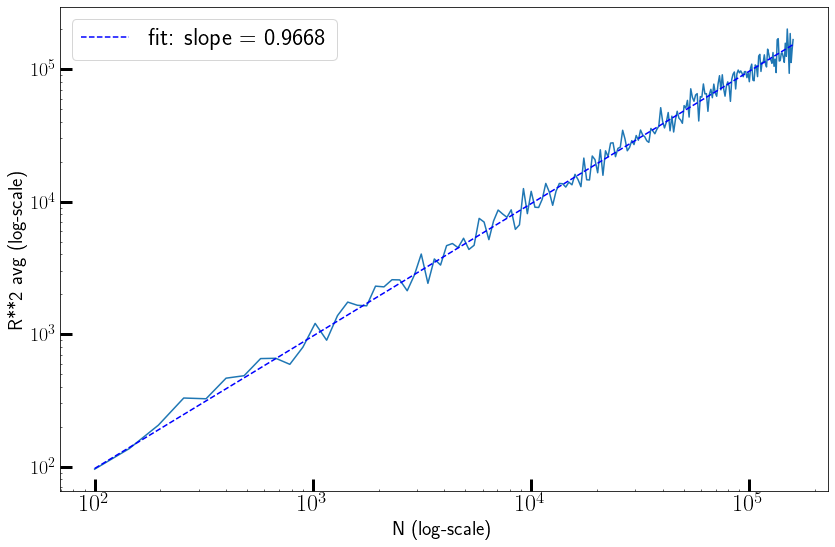

CPU times: user 20.5 s, sys: 55.9 ms, total: 20.6 s
Wall time: 20.8 s


In [ ]:
%%time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20

def randwalk2d(nsteps, repeat=6):
    '''
    Returns numpy arrays of coordinates constituting a 2D random walk, 
    Starting from the origin (0,0)

            Parameters:
                    nsteps (int): Number of steps in a random walk
                    repeat (int): Number of independent random walks. 
                                Default is 6.

            Returns:
                    A list of numpy arrays, each constituting an ordered 
                    sequence of random walks
    '''
    points = []
    for i in range(repeat):
        dr_vals = 2.0 * np.random.random((nsteps,2)) -1 # dx, dy points between -1 and 1
        Lvals = np.sum(dr_vals**2, axis=1) # Vector lengths of those points
        dr_vals /= np.sqrt(Lvals[:, None]) # Normalize the points
        points.append(np.cumsum(dr_vals, axis=0)) #Perform the random walk
    return points

nsteps = np.arange(10,400,2)**2

Rsq_avs = []
for nstp in nsteps:
    walks = randwalk2d(nstp, repeat=50)
    Rsq_avs.append(np.average([np.linalg.norm(w[-1])**2 for w in walks]))
plt.loglog(nsteps, Rsq_avs)

popt, pcov = curve_fit(lambda x,a: a * x, nsteps, Rsq_avs)
plt.loglog(nsteps, popt[0] * nsteps, 'b--', label=f'fit: slope = {popt[0]:2.4f}')
plt.xlabel("N (log-scale)")
plt.ylabel("R**2 avg (log-scale)")

plt.legend()
plt.show()